Consider the dataset credit_data.csv. A1-A15 = Attributes, T - Target (positive or negative credit). Train a decision tree with 2 different methods - ID3 and CART. Split the data into 75% train and 25% test.

Find the accuracy on test data for two different methods.

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import tree

pd.set_option('display.max_columns', None)

In [2]:
# Load data
credit_data = pd.read_csv('C:/Users/Karthik.Iyer/Downloads/AccelerateAI/Tree-Based-Models-main/01_credit_data.csv')
credit_data.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,T
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43,560,+
2,a,24.5,0.500,u,g,q,h,1.50,t,f,0,f,g,280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120,0,+


In [3]:
# Check info
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      690 non-null    object 
 1   A2      690 non-null    object 
 2   A3      690 non-null    float64
 3   A4      690 non-null    object 
 4   A5      690 non-null    object 
 5   A6      690 non-null    object 
 6   A7      690 non-null    object 
 7   A8      690 non-null    float64
 8   A9      690 non-null    object 
 9   A10     690 non-null    object 
 10  A11     690 non-null    int64  
 11  A12     690 non-null    object 
 12  A13     690 non-null    object 
 13  A14     690 non-null    object 
 14  A15     690 non-null    int64  
 15  T       690 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 86.4+ KB


In [4]:
# Check shape
credit_data.shape

(690, 16)

In [5]:
# Check A2 as it looks numeric but data type is object
credit_data['A2'].value_counts(normalize=True)*100

?        1.739130
22.67    1.304348
20.42    1.014493
18.83    0.869565
24.5     0.869565
           ...   
48.25    0.144928
28.33    0.144928
18.75    0.144928
18.5     0.144928
36.42    0.144928
Name: A2, Length: 350, dtype: float64

In [6]:
# Only 1.7% rows have these values ?. Lets drop them
credit_data.drop(credit_data[credit_data['A2'] == '?'].index, inplace=True)

In [7]:
# Check A14 as it looks numeric but data type is object
val = credit_data['A14'].value_counts(normalize=True)*100
val[:20]

0      19.026549
120     5.162242
200     5.014749
160     5.014749
100     4.424779
80      4.424779
280     3.244838
180     2.654867
140     2.359882
240     2.064897
320     1.917404
?       1.769912
300     1.769912
260     1.622419
400     1.327434
60      1.327434
220     1.327434
340     1.032448
360     1.032448
440     0.589971
Name: A14, dtype: float64

In [8]:
# Only 1.7% rows have these values ?. Lets drop them
credit_data.drop(credit_data[credit_data['A14'] == '?'].index, inplace=True)

In [9]:
# Check shape
credit_data.shape

(666, 16)

In [10]:
# Lets convert A2 to float and A14 to int64
credit_data['A2'] = credit_data['A2'].astype('float')
credit_data['A14'] = credit_data['A14'].astype('int64')

In [11]:
# Check data type
credit_data.dtypes

A1      object
A2     float64
A3     float64
A4      object
A5      object
A6      object
A7      object
A8     float64
A9      object
A10     object
A11      int64
A12     object
A13     object
A14      int64
A15      int64
T       object
dtype: object

In [12]:
# Lets create dummy variables
A1_dum = pd.get_dummies(credit_data['A1'], prefix='A1', drop_first=True)
A4_dum = pd.get_dummies(credit_data['A4'], prefix='A4', drop_first=True)
A5_dum = pd.get_dummies(credit_data['A5'], prefix='A5', drop_first=True)
A6_dum = pd.get_dummies(credit_data['A6'], prefix='A6', drop_first=True)
A7_dum = pd.get_dummies(credit_data['A7'], prefix='A7', drop_first=True)
A9_dum = pd.get_dummies(credit_data['A9'], prefix='A9', drop_first=True)
A10_dum = pd.get_dummies(credit_data['A10'], prefix='A10', drop_first=True)
A12_dum = pd.get_dummies(credit_data['A12'], prefix='A12', drop_first=True)
A13_dum = pd.get_dummies(credit_data['A13'], prefix='A13', drop_first=True)

# Lets merge with original data
credit_data = pd.concat([A1_dum,A4_dum,A5_dum,A6_dum,A7_dum,A9_dum,A10_dum,A12_dum,A13_dum,credit_data], axis=1)

# Drop columns
credit_data.drop(['A1','A4','A5','A6','A7','A9','A10','A12','A13'], axis=1, inplace=True)

# Check data
credit_data.head()

,A1_a,A1_b,A4_u,A4_y,A5_gg,A5_p,A6_aa,A6_c,A6_cc,A6_d,A6_e,A6_ff,A6_i,A6_j,A6_k,A6_m,A6_q,A6_r,A6_w,A6_x,A7_bb,A7_dd,A7_ff,A7_h,A7_j,A7_n,A7_o,A7_v,A7_z,A9_t,A10_t,A12_t,A13_p,A13_s,A2,A3,A8,A11,A14,A15,T
0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,30.83,0.000,1.25,1,202,0,+
1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,58.67,4.460,3.04,6,43,560,+
2,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,24.50,0.500,1.50,0,280,824,+
3,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,1,1,0,0,27.83,1.540,3.75,5,100,3,+
4,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,20.17,5.625,1.71,0,120,0,+


In [13]:
# Check Target
credit_data['T'].value_counts()

-    367
+    299
Name: T, dtype: int64

In [14]:
# Map Target
credit_data['T'] = credit_data['T'].map({'+':1, '-':0})

# Check T
credit_data['T'].value_counts()

0    367
1    299
Name: T, dtype: int64

In [15]:
# Prepare X and y
X = credit_data.drop('T', axis=1)
y = credit_data['T']

In [16]:
# Split data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=42)

In [17]:
# ID3
clf = tree.DecisionTreeClassifier(criterion='entropy')
clf = clf.fit(X_train, y_train)

[Ellipsis]

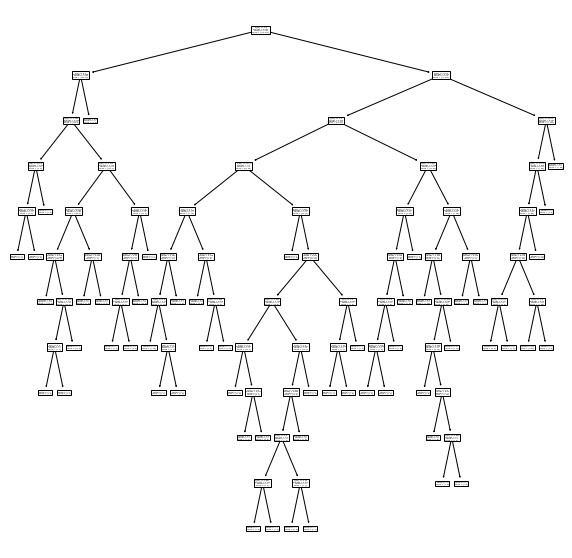

In [18]:
plt.figure(figsize=(10,10))
tree.plot_tree(clf)
[...]

In [19]:
# Predit on test data
p_pred = clf.predict_proba(X_test)
y_pred = clf.predict(X_test)

score_ = clf.score(X_test, y_test)
print(score_)

0.7784431137724551


In [20]:
# CART
clf2 = tree.DecisionTreeClassifier(criterion='gini')
clf2 = clf2.fit(X_train, y_train)

[Ellipsis]

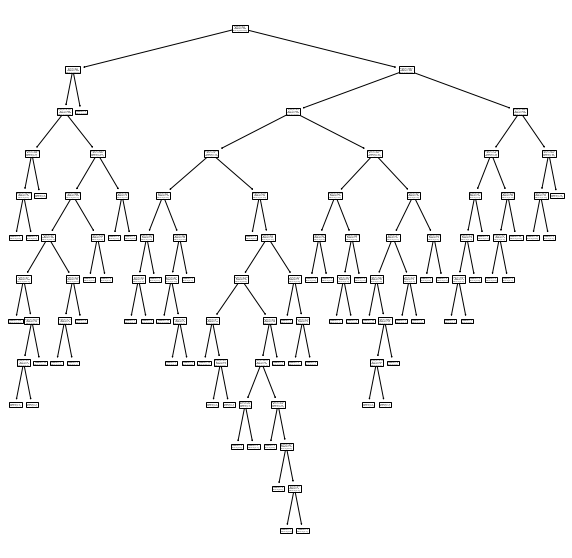

In [21]:
plt.figure(figsize=(10,10))
tree.plot_tree(clf2)
[...]

In [22]:
# Predict on test data
p_pred = clf2.predict_proba(X_test)
y_pred = clf2.predict(X_test)

score_ = clf2.score(X_test, y_test)
print(score_)

0.7844311377245509


There is no substantial improvement in the accuracy after using CART over ID3, and hence both the models are suggested here.

In [23]:
# Lets check different hyperparameters
# Case 1: max_depth = 5,6 and 7

case_1 = [5,6,7]
d = {'Cases':[], 'Train Accuracy':[], 'Test Accuracy':[]}

for i in case_1:
    clf_case1 = tree.DecisionTreeClassifier(criterion='gini', max_depth=i)
    clf_case1 = clf_case1.fit(X_train,y_train)
    train_score_case1 = clf_case1.score(X_train, y_train)
    test_score_case1 = clf_case1.score(X_test, y_test)
    d['Cases'].append('max_depth='+str(i))
    d['Train Accuracy'].append(round(train_score_case1,2))
    d['Test Accuracy'].append(round(test_score_case1,2))

print(pd.DataFrame(d))

         Cases  Train Accuracy  Test Accuracy
0  max_depth=5            0.94           0.81
1  max_depth=6            0.96           0.81
2  max_depth=7            0.97           0.81


Train Accuracy is increasing as the depth increases, but Test Accuracy remains same. So there is ovefitting on training data

In [24]:
# Lets check different hyperparameters
# Case 2: min_samples_split = 10,15 and 20

case_2 = [10,15,20]
d = {'Cases':[], 'Train Accuracy':[], 'Test Accuracy':[]}

for i in case_2:
    clf_case2 = tree.DecisionTreeClassifier(criterion='gini', min_samples_split=i)
    clf_case2 = clf_case2.fit(X_train,y_train)
    train_score_case2 = clf_case2.score(X_train, y_train)
    test_score_case2 = clf_case2.score(X_test, y_test)
    d['Cases'].append('min_samples_split='+str(i))
    d['Train Accuracy'].append(round(train_score_case2,2))
    d['Test Accuracy'].append(round(test_score_case2,2))

print(pd.DataFrame(d))

                  Cases  Train Accuracy  Test Accuracy
0  min_samples_split=10            0.97           0.81
1  min_samples_split=15            0.94           0.80
2  min_samples_split=20            0.93           0.84


Train Accuracy is decreasing, but Test Accuracy first decreases and then increases and becomes highest for min_samples_split=20. It hepls in reducing overfitting with increase in minimum samples split.

In [25]:
# Lets check different hyperparameters
# Case 3: max_features = sqrt and log2

case_3 = ['sqrt', 'log2']
d = {'Cases':[], 'Train Accuracy':[], 'Test Accuracy':[]}

for i in case_3:
    clf_case3 = tree.DecisionTreeClassifier(criterion='gini', max_features=i)
    clf_case3 = clf_case3.fit(X_train,y_train)
    train_score_case3 = clf_case3.score(X_train, y_train)
    test_score_case3 = clf_case3.score(X_test, y_test)
    d['Cases'].append('max_features='+i)
    d['Train Accuracy'].append(round(train_score_case3,2))
    d['Test Accuracy'].append(round(test_score_case3,2))

print(pd.DataFrame(d))

               Cases  Train Accuracy  Test Accuracy
0  max_features=sqrt             1.0           0.75
1  max_features=log2             1.0           0.72


It clearly overfits on Training set, but log2 is better than sqrt, as the Test accuracy is better in case of log2 than sqrt.